**قدم اول**

ابتدا دیتاست مربوطه را با دستور گفته شده دانلود میکنیم

In [135]:
!gdown --id 1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g -O CIFAR10.tar.gz
!tar xzf CIFAR10.tar.gz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g
To: /content/CIFAR10.tar.gz
100% 19.8M/19.8M [00:00<00:00, 106MB/s] 


کتاب خانه های مربوطه را اضافه کردیم

In [136]:
import numpy as np
import tensorflow
import os
from six.moves import cPickle 
%matplotlib inline 
import pickle
import matplotlib.image as mpimg
import math
from matplotlib import pyplot as plt
import random
import pickle
from statistics import mean
import matplotlib.image as plotimg
from datetime import datetime

برای آشنایی بیشنر با دیتاست، از هر کلاس، اولین نمونه را نمایش دادیم. 5 تا از آن ها مربوط به فولدر تست و 5 تا از آن ها مربوط به فولدر ترین است

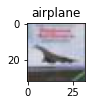

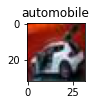

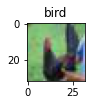

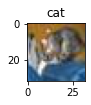

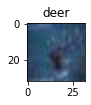

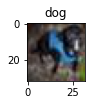

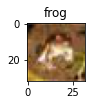

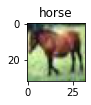

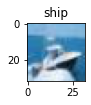

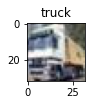

In [137]:
## directory of 10 pictures
picTest0 = "/content/CIFAR10/test/airplane/0000.jpg"
picTest1 = "/content/CIFAR10/test/automobile/0000.jpg"
picTest2 = "/content/CIFAR10/test/bird/0000.jpg"
picTest3 = "/content/CIFAR10/test/cat/0000.jpg"
picTest4 = "/content/CIFAR10/test/deer/0000.jpg"

picTrain0 = "/content/CIFAR10/train/dog/0000.jpg"
picTrain1 = "/content/CIFAR10/train/frog/0000.jpg"
picTrain2 = "/content/CIFAR10/train/horse/0000.jpg"
picTrain3 = "/content/CIFAR10/train/ship/0000.jpg"
picTrain4 = "/content/CIFAR10/train/truck/0000.jpg"

imageFile0 = os.path.join(picTest0)
imageFile1 = os.path.join(picTest1)
imageFile2 = os.path.join(picTest2)
imageFile3 = os.path.join(picTest3)
imageFile4 = os.path.join(picTest4)
imageFile5 = os.path.join(picTrain0)
imageFile6 = os.path.join(picTrain1)
imageFile7 = os.path.join(picTrain2)
imageFile8 = os.path.join(picTrain3)
imageFile9 = os.path.join(picTrain4)

## read the images
plt.subplot(2, 5, 2)
img0 = plotimg.imread(imageFile0)
imgplot = plt.imshow(img0)
plt.title('airplane')
plt.show()

plt.subplot(2, 5, 2)
img1 = plotimg.imread(imageFile1)
imgplot = plt.imshow(img1)
plt.title('automobile')
plt.show()

plt.subplot(2, 5, 2)
img2 = plotimg.imread(imageFile2)
imgplot = plt.imshow(img2)
plt.title('bird')
plt.show()

plt.subplot(2, 5, 2)
img3 = plotimg.imread(imageFile3)
imgplot = plt.imshow(img3)
plt.title('cat')
plt.show()

plt.subplot(2, 5, 2)
img4 = plotimg.imread(imageFile4)
imgplot = plt.imshow(img4)
plt.title('deer')
plt.show()

plt.subplot(2, 5, 2)
img5 = plotimg.imread(imageFile5)
imgplot = plt.imshow(img5)
plt.title('dog')
plt.show()

plt.subplot(2, 5, 2)
img6 = plotimg.imread(imageFile6)
imgplot = plt.imshow(img6)
plt.title('frog')
plt.show()

plt.subplot(2, 5, 2)
img7 = plotimg.imread(imageFile7)
imgplot = plt.imshow(img7)
plt.title('horse')
plt.show()

plt.subplot(2, 5, 2)
img8 = plotimg.imread(imageFile8)
imgplot = plt.imshow(img8)
plt.title('ship')
plt.show()

plt.subplot(2, 5, 2)
img9 = plotimg.imread(imageFile9)
imgplot = plt.imshow(img9)
plt.title('truck')
plt.show()


در این بخش ابتدا 4 آرایه ای که در انتها باید نمایش دهیم را ساختیم پس از آن آدرس 4 کلاس اول خواسته شده از تست و ترین را نمایش دادیم سپس در 8 مرحله(4 مرحله برای چهار کلاس ترین و چهار مرحله برای چهار کلاس تست) عکس های مربوط به هر دسته بندی را ابتدا خواندیم و بعد عکس ها را در آرایه ها قرار دادیم به طوری که عکس های مربوط به فولدر ترین در آرایه داده های ترین و عکس های مربوط به فولدر تست را در آرایه داده های ترین قرار دادیم به همین ترتیب لیبل ها را نیز ذخیره کردیم تنها نکته مربوط به لیبل ها این است که بسته به آن که لیبل در کدام کلاس قرار دارد، مقدار متفاوتی در آرایه برای آن ذخیره میشود؛ یعنی برای کلاس هواپیما تنها اولین خانه آرایه 1 و بقیه صفر، برای کلاس اتومبیل، تنها دومین خانه یک و همین طور برای بقیه کلاس ها هم به همین ترتیب است. در نهایت آرایه ها را نمایش دادیم. که برای داده های ترین چهار مولفه دارد. اولیش  20000 بوده که حاصل ضرب 5000 در 4 است که 5000 مربوط به تعداد عکس ها و 4 مربوط به تعداد کلاس های مورد استفاده ما در مسئله است. دومی و سومی 32 است که ابعاد را مشخص میکند و مولفه آخر به سبب سه کاناله بودن است. به همین  ترتیب برای داده های تست، 4 مولفه با مقادیر 4000 که حاصل ضرب 1000 در 4 و 32 و 32و 3 است داریم. در نهایت برای لیبل ها دو مولفه داریم که اولین مولفه حاصل ضرب 4 در تعداد عکس هاست و مولفه دوم 4 است     

In [138]:
## array for save datas and labels
testData = [] 
trainData = []
testLabel = []
trainLabel = []

## directory of the classes "airplane", "automobile", "bird", "cat"
train0 = '/content/CIFAR10/train/airplane'
train1 = '/content/CIFAR10/train/automobile'
train2 = '/content/CIFAR10/train/bird'
train3 = '/content/CIFAR10/train/cat'

test0 = '/content/CIFAR10/test/airplane'
test1 = '/content/CIFAR10/test/automobile'
test2 = '/content/CIFAR10/test/bird'
test3 = '/content/CIFAR10/test/cat'

## append images and their labels in the appropriate arrays
for image in os.listdir(train0):
  img = mpimg.imread(os.path.join(train0, image))
  images = np.asarray(img)
  trainData.append(images)
  trainLabel.append([1, 0, 0, 0])

for image in os.listdir(train1):
  img = mpimg.imread(os.path.join(train1, image))
  images = np.asarray(img)
  trainData.append(images)
  trainLabel.append([0, 1, 0, 0])

for image in os.listdir(train2):
  img = mpimg.imread(os.path.join(train2, image))
  images = np.asarray(img)
  trainData.append(images)
  trainLabel.append([0, 0, 1, 0])

for image in os.listdir(train3):
  img = mpimg.imread(os.path.join(train3, image))
  images = np.asarray(img)
  trainData.append(images)
  trainLabel.append([0, 0, 0, 1])

for image in os.listdir(test0):
  img = mpimg.imread(os.path.join(test0, image))
  images = np.asarray(img)
  testData.append(images)
  testLabel.append([1, 0, 0, 0])

for image in os.listdir(test1):
  img = mpimg.imread(os.path.join(test1, image))
  images = np.asarray(img)
  testData.append(images)
  testLabel.append([0, 1, 0, 0])

for image in os.listdir(test2):
  img = mpimg.imread(os.path.join(test2, image))
  images = np.asarray(img)
  testData.append(images)
  testLabel.append([0, 0, 1, 0])

for image in os.listdir(test3):
  img = mpimg.imread(os.path.join(test3, image))
  images = np.asarray(img)
  testData.append(images)
  testLabel.append([0, 0, 0, 1])

trainData = np.array(trainData)
trainLabel = np.array(trainLabel)
testData = np.array(testData)
testLabel = np.array(testLabel)
print("for train: ")   
print(trainData.shape)   
print(trainLabel.shape) 
print("for test: ")
print(testData.shape)   
print(testLabel.shape)

for train: 
(20000, 32, 32, 3)
(20000, 4)
for test: 
(4000, 32, 32, 3)
(4000, 4)


در این بخش کد گفته شده در دستور کار را برای تبدیل عکس سه کاناله به عکس خاکستری استفاده کرده و در نهایت از این تابع استفاده کردیم و دوباره آرایه های داده های ترین و تست را پرینت کردیم. همین طور که در خروجی نیز دیده میشود، آخرین مولفه یعنی سه که در خروجی قسمت پیش بود، در این قسمت به دلیل خاکستری بودن از بین رفت

In [139]:
## convert to gray scale
def rgb2gray(rgb):
 r, g, b = rgb[:, :, :, 0], rgb[:, :, :,1], rgb[:, :, :, 2]
 gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
 return gray

trainGray = rgb2gray(trainData)
testGray = rgb2gray(testData)
print(trainGray.shape, testGray.shape)

(20000, 32, 32) (4000, 32, 32)


در این بخش، برای آن که داده را نرمال کنیم، مقدار آن را تقسیم بر 255 کردیم تا بین صفر و یک قرار بگیرند

In [140]:
## normalize
testData = (testGray/255)
trainData =(trainGray/255)

In [141]:
## flat
testData = testData.reshape(-1,1024)
trainData = trainData.reshape(-1,1024)

این تابع، دو ورودی گرفته که در این جا داده ها به همراه لیبل هایشان هستند؛، آن ها را توسط تابع پرمیوتیشن، شافل میکنیم و سپس آرایه های شافل شده را برمیگردانیم. بنابراین با این تابع، داده های تست و لیبل هایش و داده های ترین و لیبل هایش، شافل میشوند  

In [142]:
## shuffled
def shuffle(arrA, arrB):
  permute = np.random.permutation(len(arrA))
  return arrA[permute], arrB[permute]

testData, testLabel = shuffle(testData, testLabel)
trainData, trainLabel = shuffle(trainData, trainLabel)

print(testData.shape, trainData.shape)

(4000, 1024) (20000, 1024)


**قدم دوم**

در این بخش ابتدا تابع سیگوئید را تعریف کردیم که در ادامه قرار است از آن استفاده کنیم. سپس مقادیر وزن ها را طبق گفته مسئله مقدار تصادفی و مقادیر بایاس را هم صفر کردیم. مقادیر وزن یک ماتریس دو بعدی است که بعد اول آن تعداد نورون های لایه بعد و بعد دوم آن تعداد نورون های لایه فعلی است و مقادیر بایاس نیز یک بردار است که تعداد آن، برابر تعداد نورون های لایه بعدی است. همان طور که میدانیم تعداد نورون های ورودی 1024، تعداد نورون های پنهانی 16 که دو لایه پنهانی داریم و تعداد نورون های خروجی نیز 4 تا است. در ابتدا تابعی را تعریف کردیم که به کمک این تابع میتوان اندیس بزرگ ترین مقدار موجود در آرایه را به دست آورد. در تابع فیدفوروارد، یک شمارنده وجود دارد که تعداد حدس های درست را میشمارد و در نهایت با تقسیم بر کل داده های موجود که در این جا 200 است، درصد درستی پیش بینی را تخمین میزند که در این مثال ،چون وزن های اولیه تصادفی انتخاب شده اند، درصد درستی در حدود 25 است. اتفاقی که در تابع فیدفوروارد می افتد این است که به اندازه دیتاست که در این مثال 200 است، ابتدا آرایه داده ترین را یک بعدی کرده با عملیات ری شیپ و بعد از آن عملیات فیدفورواردینگ انجام می شود یعنی مقدار داده ها را در وزنشان ضرب کرده و با مقدار بایاس جمع میکند و از خروجی به دست آمده در ورودی لایه بعد استفاده میکند و همین طور تا به آخرین لایه رسیده و به خروجی نهایی برسد. در انتها نیز چک میکند که آیا اندیس بزرگ ترین مقدار در خروجی، با اندیس بزرگ ترین مقدار در آرایه ترین ها برابر است یا خیر که اگر برابر باشد به این معنی است که حدس، درست زده شده و به خوبی پیش بینی انجام شده پس به مقدار شمارنده افزوده می شود  

In [143]:
## definition of activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## all the wights set random and biases set to zero
w0 = np.random.normal(size=(16,1024))
w1 = np.random.normal(size=(16, 16))
w2 = np.random.normal(size=(4, 16))
b0 = np.zeros((16, 1))
b1 = np.zeros((16, 1))
b2 = np.zeros((4, 1))

## this function returns the index of the biggest element in the array
def maxIndex(arr):
  max = -math.inf
  index = 0
  for i in range(len(arr)):
    if arr[i] > max:
      max = arr[i]
      index = i
  return index

def feedforward(w0, w1, w2, b0, b1, b2):
    counter = 0
    for i in range (200):
     reshapeTrain = trainData[i].reshape(-1,1)
     s0 = sigmoid(w0 @ reshapeTrain + b0)
     s1 = sigmoid(w1 @ s0 + b1)
     ## output
     s2 = sigmoid(w2 @ s1 + b2)

     if maxIndex(s2) == maxIndex(trainLabel[i]):
       counter += 1

    print("Accuracy is: ", (counter/200) * 100)


feedforward(w0, w1, w2, b0, b1, b2)

Accuracy is:  28.499999999999996


**قدم سوم**

در این بخش، ابتدا فرضیات مسئله مانند نرخ یادگیری و غیره را مکتوب کردیم. پس از آن آرایه ای از مجموعه ترین و تست درست کردیم که به ازای تمامی داده های موجود درآن ها که در فولدر ترین 20000 و در فولدر تست 4000 است، داده ها به همراه لیبلشان را ذخیره کردیم. در نهایت تابع بک پروپگیشن را صدا میزنیم. زمانی که در این تابع صرف میشود را به کمک تابع دیت تایم به دست می آوریم. به اندازه تعداد ایپاک هایمان که در این جا 10 تاست و هرچه بیشتر شود این مدت زمان نیز افزایش میابد، برای هر مینی بچ، همان کار های مربوط به فیدفوروارد را انجام میدهیم. البته تفاوتی که وجود دارد این است که از تابع سیگموئید و مشتق آن استفاده میکنیم و از روش گرادیان استفاده میکنیم تا هزینه ها را کاهش دهیم؛ در واقع از آخرین لایه شروع کرده و به کمک مشتق جزئی که در درس خواندیم، آنقدر پیش میرویم و گرادیان را آپدیت میکنیم تا به اولین لایه برسیم. و وزن ها را نیز تغییر میدهیم. در نهایت هزینه را محاسبه کرده که باید روند نزولی داشته باشد و همانند قسمت فیدفورواردینگ در گام قبل که توضیح داده شد، دقت را میسنجیم. با استفاده از تابع پلات نیز هزینه را به ازای مقادیر مختلف روی نمودار میتوانیم نشان دهیم. 

running time is:  0:01:30.097069
Accuracy: 0.375


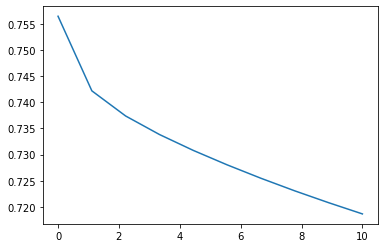

In [148]:
batchSize = 16
learningRate = 0.3
epochsNum = 10
totalCost = []

#create sets of image
trainSet = []
testSet = []
for i in range(4000):
  testSet.append((testData[i, :].T.reshape(1024, 1), testLabel[i, :].T.reshape(4, 1)))

for i in range(20000):
  trainSet.append((trainData[i, :].T.reshape(1024, 1), trainLabel[i, :].T.reshape(4, 1)))
batches = [trainSet[j:j+batchSize] for j in range(0, 200, batchSize)]

def backpropagation(w0, w1, w2, b0, b1, b2):

  startTime = datetime.now() 

  for i in range(epochsNum):
    batches = [trainSet[x: x+batchSize] for x in range(0, 200, batchSize)]

    for batch in batches:

      w0Grad = np.zeros((16, 1024))
      w1Grad = np.zeros((16, 16))
      w2Grad = np.zeros((4, 16))
      b0Grad = np.zeros((16,1))
      b1Grad = np.zeros((16,1))
      b2Grad = np.zeros((4,1))

      for image, label in batch:
        s0 = sigmoid(w0 @ image + b0)
        s1 = sigmoid(w1 @ s0 + b1)
        s2 = sigmoid(w2 @ s1 + b2)

        ## output layer
        for j in range(4): 
          for k in range(16):
            w2Grad[j, k] += s1[k,0] * (1 - s2[j, 0]) * (s2[j,0]) * (s2[j, 0] - label[j,0]) * 2
        
        for j in range(4):
          b2Grad[j, 0] += (1 - s2[j, 0]) * (s2[j,0]) * (s2[j, 0] - label[j,0]) * 2

        ## second hidden layer
        s1Grad = np.zeros((16, 1))
        for j in range(16):
          for k in range(4):
            s1Grad[j,0] += w2[k, j] * (1 - s2[k, 0]) * (s2[k,0]) * (s2[k, 0] - label[k, 0]) *  2 

        for j in range(16):
                for k in range(16):
                    w1Grad[j, k] += s0[k, 0] * (1 - s1[j, 0]) * (s1[j, 0])  * s1Grad[j, 0]

      
        for j in range(16):
            b1Grad[j, 0] += (1 - s1[j, 0]) * (s1[j, 0]) * s1Grad[j, 0] 


        ## first hidden layer
        s0Grad = np.zeros((16,1))
        for j in range(16): 
          for k in range(16): 
            s0Grad[j, 0] += w1[k, j] * (1 - s1[k, 0]) * (s1[k, 0]) * s1Grad[k, 0]
        
        for j in range(16):
            for k in range(1024):
                w0Grad[j, k] += s0Grad[j, 0] * (s0[j, 0]) * (1 - s0[j, 0]) * image[k, 0]  

        for j in range(16):
                b0Grad[j, 0] += s0Grad[j, 0] * (s0[j, 0]) * (1 - s0[j, 0])


      w0 -= learningRate * (w0Grad / batchSize)
      w1 -= learningRate * (w1Grad / batchSize)
      w2 -= learningRate * (w2Grad / batchSize)

      b0 -= learningRate * (b0Grad / batchSize)
      b1 -= learningRate * (b1Grad / batchSize)
      b2 -= learningRate * (b2Grad / batchSize)

  #calculate the cost
    cost = 0
    counter = 0
    for data in trainSet[:200]:
      s0 = sigmoid(w0 @ data[0] + b0)
      s1 = sigmoid(w1 @ s0 + b1)
      s2 = sigmoid(w2 @ s1 + b2)
    
      if maxIndex(s2) == maxIndex(data[1]):
        counter += 1

      for j in range(4):
        cost += np.power((s2[j, 0] - data[1][j, 0]), 2)

    totalCost.append(cost / 200) 

  stopTime = datetime.now()

  start = 0
  end = epochsNum
  x = np.linspace(start, end, int((end - start)))
  y  = totalCost
  plt.plot(x, y)
  print("running time is: ", stopTime - startTime)
  print("Accuracy:" ,counter / 200)

w0 = np.random.normal(size=(16, 1024))
w1 = np.random.normal(size=(16,16))
w2 = np.random.normal(size=(4,16))

b0 = np.zeros((16, 1))
b1 = np.zeros((16, 1))
b2 = np.zeros((4, 1))   

backpropagation(w0, w1, w2, b0, b1, b2)

**قدم چهارم**

این مرحله دقیقا مانند گام بک پروپگیشن است با این تفاوت که به جای آن که از فور های تو در تو استفاده کند و زمان اجرای فرآیند طولانی باشد، زمان را کاهش می دهد. همان طور که در نتیجه نیز دیده میشود، تقریبا برای اجرای هر بار تابع بک پروپگیشن یک دقیقه و نیم وقت لازم بود در حالی که در تابع وکتوریزیشن، این زمان به حدود یک ثانیه کاهش می یابد که ایده آل ماست.
نحوه کاهش زمان نیز این گونه است که با عمل ترنسپوز، ماتریس ذخیره میکند.
بنابراین ما برای به دست آوردن گرایان ها و بایاس ها، از همان فرمول های مرحله قبل استفاده میکنیم و در نهایت با خروجی تابع سیگموئید مربوط به مرحله مد نظر، ترنسپوز میکنیم. 

time:  1
running time is:  0:00:01.544922
Accuracy: 0.41

time:  2
running time is:  0:00:01.508906
Accuracy: 0.375

time:  3
running time is:  0:00:01.499584
Accuracy: 0.42

time:  4
running time is:  0:00:01.439204
Accuracy: 0.405

time:  5
running time is:  0:00:01.515563
Accuracy: 0.425

time:  6
running time is:  0:00:01.519780
Accuracy: 0.425

time:  7
running time is:  0:00:01.547866
Accuracy: 0.375

time:  8
running time is:  0:00:01.520945
Accuracy: 0.42

time:  9
running time is:  0:00:01.497756
Accuracy: 0.47

time:  10
running time is:  0:00:01.469808
Accuracy: 0.455


Average runnig time is  0:00:01.506433
Average Accuracy is  0.418


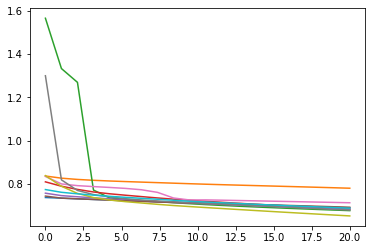

In [163]:
batchSize = 16
learningRate = 0.3
epochsNum = 20

accuracySum = []
timeSum = []

def vectorization(w0, w1, w2, b0, b1, b2):
  startTime = datetime.now()
  totalCost = []

  w0 = np.random.normal(size=(16, 1024))
  w1 = np.random.normal(size=(16,16))
  w2 = np.random.normal(size=(4,16))

  b0 = np.zeros((16, 1))
  b1 = np.zeros((16, 1))
  b2 = np.zeros((4, 1))

  for i in range(epochsNum):
    batches = [trainSet[x: x+batchSize] for x in range(0, 200, batchSize)]

    for batch in batches:

      w0Grad = np.zeros((16, 1024))
      w1Grad = np.zeros((16, 16))
      w2Grad = np.zeros((4, 16))
      b0Grad = np.zeros((16,1))
      b1Grad = np.zeros((16,1))
      b2Grad = np.zeros((4,1))

      for image, label in batch:
        s0 = sigmoid(w0 @ image + b0)
        s1 = sigmoid(w1 @ s0 + b1)
        s2 = sigmoid(w2 @ s1 + b2)

        ## output layer
        w2Grad += 2 * (s2 - label) * s2 * (1 - s2) @ np.transpose(s1)
        b2Grad += 2 * (s2 - label) * s2 * (1 - s2)

        ## second hidden layer
        s1Grad = np.zeros((16, 1))
        s1Grad += np.transpose(w2) @ (2 * (s2 - label) * (s2 * (1 - s2)))                
        w1Grad += ( s1 * (1 - s1) *s1Grad) @ np.transpose(s0)
        b1Grad += s1Grad * s1 * (1 - s1)

        ## first hidden layer
        s0Grad = np.zeros((16, 1))
        s0Grad +=   np.transpose(w1) @ (s1Grad * s1 * (1 - s1))
        w0Grad += (s0Grad * s0 * (1 - s0) ) @ np.transpose(image)
        b0Grad += s0Grad * s0 * (1 - s0)

      w0 -= learningRate * (w0Grad / batchSize)
      w1 -= learningRate * (w1Grad / batchSize)
      w2 -= learningRate * (w2Grad / batchSize)

      b0 -= learningRate * (b0Grad / batchSize)
      b1 -= learningRate * (b1Grad / batchSize)
      b2 -= learningRate * (b2Grad / batchSize)

    #calculate the cost
    cost = 0
    counter = 0
    for data in trainSet[:200]:
      s0 = sigmoid(w0 @ data[0] + b0)
      s1 = sigmoid(w1 @ s0 + b1)
      s2 = sigmoid(w2 @ s1 + b2)
    
      if maxIndex(s2) == maxIndex(data[1]):
        counter += 1

      for j in range(4):
        cost += np.power((s2[j, 0] - data[1][j, 0]), 2)

    totalCost.append(cost / 200) 

  stopTime = datetime.now()

  start = 0
  end = epochsNum
  x = np.linspace(start, end, int((end - start)))
  y  = totalCost
  plt.plot(x, y)
  timeSum.append(stopTime - startTime)
  accuracySum.append(counter / 200)
  print("running time is: ", stopTime - startTime)
  print("Accuracy:" ,counter / 200)
  print()

for i in range(10):
  print("time: ", i+1 )
  vectorization(w0, w1, w2, b0, b1, b2)

print()
print("Average runnig time is " , np.sum(timeSum)/10)
print("Average Accuracy is " , np.sum(accuracySum)/10)

**قدم پنجم**

این قسمت تماما مانند عملیات ویکتوریزیشنی است که در گام چهار انجام دادیم با این تفاوت که داده های پردازشی برای ترین 8000 و برای تست، 4000 تا بودند.

time:  1
running time is:  0:02:00.585532
Accuracy: 0.57425

time:  2
running time is:  0:01:55.067174
Accuracy: 0.550375

time:  3
running time is:  0:01:53.111151
Accuracy: 0.545375

time:  4
running time is:  0:01:52.691890
Accuracy: 0.53375

time:  5
running time is:  0:01:53.309015
Accuracy: 0.54675

time:  6
running time is:  0:01:52.863779
Accuracy: 0.534

time:  7
running time is:  0:01:52.914902
Accuracy: 0.5545

time:  8
running time is:  0:01:53.157296
Accuracy: 0.539625

time:  9
running time is:  0:01:53.043586
Accuracy: 0.53225

time:  10
running time is:  0:01:53.041740
Accuracy: 0.54375


Average runnig time is  0:01:53.978606
Average Accuracy is  0.5454625


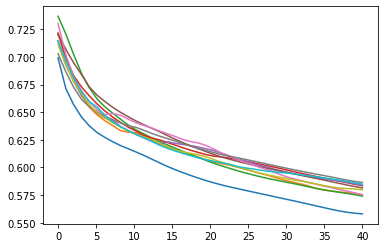

In [164]:
# model testing for train data

batchSize = 16
learningRate = 0.3
epochsNum = 40

accuracySum = []
timeSum = []

def vectorization(w0, w1, w2, b0, b1, b2):
  startTime = datetime.now()
  totalCost = []

  w0 = np.random.normal(size=(16, 1024))
  w1 = np.random.normal(size=(16,16))
  w2 = np.random.normal(size=(4,16))

  b0 = np.zeros((16, 1))
  b1 = np.zeros((16, 1))
  b2 = np.zeros((4, 1))

  for i in range(epochsNum):
    batches = [trainSet[x: x+batchSize] for x in range(0, 8000, batchSize)]

    for batch in batches:

      w0Grad = np.zeros((16, 1024))
      w1Grad = np.zeros((16, 16))
      w2Grad = np.zeros((4, 16))
      b0Grad = np.zeros((16,1))
      b1Grad = np.zeros((16,1))
      b2Grad = np.zeros((4,1))

      for image, label in batch:
        s0 = sigmoid(w0 @ image + b0)
        s1 = sigmoid(w1 @ s0 + b1)
        s2 = sigmoid(w2 @ s1 + b2)

        ## output layer
        w2Grad += 2 * (s2 - label) * s2 * (1 - s2) @ np.transpose(s1)
        b2Grad += 2 * (s2 - label) * s2 * (1 - s2)

        ## second hidden layer
        s1Grad = np.zeros((16, 1))
        s1Grad += np.transpose(w2) @ (2 * (s2 - label) * (s2 * (1 - s2)))                
        w1Grad += ( s1 * (1 - s1) *s1Grad) @ np.transpose(s0)
        b1Grad += s1Grad * s1 * (1 - s1)

        ## first hidden layer
        s0Grad = np.zeros((16, 1))
        s0Grad +=   np.transpose(w1) @ (s1Grad * s1 * (1 - s1))
        w0Grad += (s0Grad * s0 * (1 - s0) ) @ np.transpose(image)
        b0Grad += s0Grad * s0 * (1 - s0)

      w0 -= learningRate * (w0Grad / batchSize)
      w1 -= learningRate * (w1Grad / batchSize)
      w2 -= learningRate * (w2Grad / batchSize)

      b0 -= learningRate * (b0Grad / batchSize)
      b1 -= learningRate * (b1Grad / batchSize)
      b2 -= learningRate * (b2Grad / batchSize)

    #calculate the cost
    cost = 0
    counter = 0
    for data in trainSet[:8000]:
      s0 = sigmoid(w0 @ data[0] + b0)
      s1 = sigmoid(w1 @ s0 + b1)
      s2 = sigmoid(w2 @ s1 + b2)
    
      if maxIndex(s2) == maxIndex(data[1]):
        counter += 1

      for j in range(4):
        cost += np.power((s2[j, 0] - data[1][j, 0]), 2)

    totalCost.append(cost / 8000) 

  stopTime = datetime.now()

  start = 0
  end = epochsNum
  x = np.linspace(start, end, int((end - start)))
  y  = totalCost
  plt.plot(x, y)
  timeSum.append(stopTime - startTime)
  accuracySum.append(counter / 8000)
  print("running time is: ", stopTime - startTime)
  print("Accuracy:" ,counter / 8000)
  print()

for i in range(10):
  print("time: ", i+1 )
  vectorization(w0, w1, w2, b0, b1, b2)

print()
print("Average runnig time is " , np.sum(timeSum)/10)
print("Average Accuracy is " , np.sum(accuracySum)/10)

time:  1
running time is:  0:00:56.462468
Accuracy: 0.50875

time:  2
running time is:  0:00:56.655401
Accuracy: 0.504

time:  3
running time is:  0:00:56.663458
Accuracy: 0.52325

time:  4
running time is:  0:00:57.526749
Accuracy: 0.5175

time:  5
running time is:  0:00:56.544665
Accuracy: 0.525

time:  6
running time is:  0:00:56.585538
Accuracy: 0.53125

time:  7
running time is:  0:00:56.782338
Accuracy: 0.515

time:  8
running time is:  0:00:56.512333
Accuracy: 0.5195

time:  9
running time is:  0:00:56.436521
Accuracy: 0.52375

time:  10
running time is:  0:00:56.445813
Accuracy: 0.54


Average runnig time is  0:00:56.661528
Average Accuracy is  0.5207999999999999


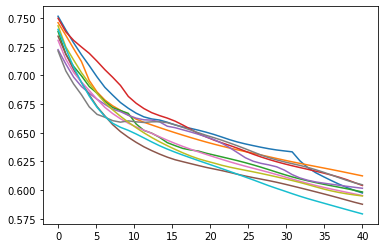

In [165]:
# model testing for test data

batchSize = 16
learningRate = 0.3
epochsNum = 40

accuracySum = []
timeSum = []

def vectorization(w0, w1, w2, b0, b1, b2):
  startTime = datetime.now()
  totalCost = []

  w0 = np.random.normal(size=(16, 1024))
  w1 = np.random.normal(size=(16,16))
  w2 = np.random.normal(size=(4,16))

  b0 = np.zeros((16, 1))
  b1 = np.zeros((16, 1))
  b2 = np.zeros((4, 1))

  for i in range(epochsNum):
    batches = [trainSet[x: x+batchSize] for x in range(0, 4000, batchSize)]

    for batch in batches:

      w0Grad = np.zeros((16, 1024))
      w1Grad = np.zeros((16, 16))
      w2Grad = np.zeros((4, 16))
      b0Grad = np.zeros((16,1))
      b1Grad = np.zeros((16,1))
      b2Grad = np.zeros((4,1))

      for image, label in batch:
        s0 = sigmoid(w0 @ image + b0)
        s1 = sigmoid(w1 @ s0 + b1)
        s2 = sigmoid(w2 @ s1 + b2)

        ## output layer
        w2Grad += 2 * (s2 - label) * s2 * (1 - s2) @ np.transpose(s1)
        b2Grad += 2 * (s2 - label) * s2 * (1 - s2)

        ## second hidden layer
        s1Grad = np.zeros((16, 1))
        s1Grad += np.transpose(w2) @ (2 * (s2 - label) * (s2 * (1 - s2)))                
        w1Grad += ( s1 * (1 - s1) *s1Grad) @ np.transpose(s0)
        b1Grad += s1Grad * s1 * (1 - s1)

        ## first hidden layer
        s0Grad = np.zeros((16, 1))
        s0Grad +=   np.transpose(w1) @ (s1Grad * s1 * (1 - s1))
        w0Grad += (s0Grad * s0 * (1 - s0) ) @ np.transpose(image)
        b0Grad += s0Grad * s0 * (1 - s0)

      w0 -= learningRate * (w0Grad / batchSize)
      w1 -= learningRate * (w1Grad / batchSize)
      w2 -= learningRate * (w2Grad / batchSize)

      b0 -= learningRate * (b0Grad / batchSize)
      b1 -= learningRate * (b1Grad / batchSize)
      b2 -= learningRate * (b2Grad / batchSize)

    #calculate the cost
    cost = 0
    counter = 0
    for data in trainSet[:4000]:
      s0 = sigmoid(w0 @ data[0] + b0)
      s1 = sigmoid(w1 @ s0 + b1)
      s2 = sigmoid(w2 @ s1 + b2)
    
      if maxIndex(s2) == maxIndex(data[1]):
        counter += 1

      for j in range(4):
        cost += np.power((s2[j, 0] - data[1][j, 0]), 2)

    totalCost.append(cost / 4000) 

  stopTime = datetime.now()

  start = 0
  end = epochsNum
  x = np.linspace(start, end, int((end - start)))
  y  = totalCost
  plt.plot(x, y)
  timeSum.append(stopTime - startTime)
  accuracySum.append(counter / 4000)
  print("running time is: ", stopTime - startTime)
  print("Accuracy:" ,counter / 4000)
  print()

for i in range(10):
  print("time: ", i+1 )
  vectorization(w0, w1, w2, b0, b1, b2)

print()
print("Average runnig time is " , np.sum(timeSum)/10)
print("Average Accuracy is " , np.sum(accuracySum)/10)